## <center> MET CS677 Data Science with Python - Assignment 2
### <center> Alan Szmyt
#### <center> Built with Python 3.10.6

In [1]:
!python --version

Python 3.10.6


In [2]:
# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_formats = {'svg',}

In [3]:
%%javascript
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        processEscapes: true
    },
    tex: {
        packages: {'[+]': ['require']},
    },
});

<IPython.core.display.Javascript object>

In [4]:
%%latex
$\require{color}$
$\definecolor{plus}{RGB}{84,178,84}$
$\definecolor{minus}{RGB}{228,61,48}$
$\def\positive{\color{plus}{"+"}}$
$\def\negative{\color{minus}{"-"}}$
$\def\rge{r_i \ge{0}}$
$\def\rl{r_i <{0}}$

<IPython.core.display.Latex object>

In [5]:
import operator
import numpy as np
import pandas as pd

from assignment2 import (
    add_true_labels,
    buy_and_hold,
    buy_from_prediction,
    colorize,
    get_labels,
    linechart,
    get_both_up_days,
    get_training_tables,
    get_testing_tables,
    get_years,
    get_statistics,
    float_to_percentage,
    predict_next_day,
    w_prediction_accuracy,
    question_1_3,
    question_1_4,
    read_stocks,
    prediction_accuracy,
    show_table,
    show_tables,
    compute_ensemble,
    style_df,
)
from constants import (
    SONY_TICKER,
    SPY_TICKER,
    DATE_KEY,
    TRUE_LABEL_KEY,
    ENSEMBLE_ORACLE_KEY,
    W_ORACLE,
    BUY_AND_HOLD_KEY,
    ENSEMBLE_KEY
)
from utils import (
    compute_probability,
    mean,
    resources,
)
from typing import cast
from pandas import DataFrame, Series
from IPython.display import Latex
from pandas.io.formats.style import Styler
from pandas._config import config # noqa
from pandas._config.config import is_bool, OptionError # noqa

# Global pandas options.
pd.set_option('display.max_rows', 10)

# TODO Don't have time.
pd.set_option('mode.chained_assignment', None)

# # Seaborn settings from
# # Reference: https://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2015/tutorials/t0c_intro_to_latex.html
# rc = {'lines.linewidth': 2,
#       'axes.labelsize': 18,
#       'axes.titlesize': 18,
#       'axes.facecolor': 'DFDFE5'}
# sns.set_context('notebook', rc=rc)
# sns.set_style('darkgrid', rc=rc)

print(f"Resources directory is located at {resources}.")

Resources directory is located at /home/alan/src/bu/cs677/assignment2/assignment2/resources.


In [6]:
# Read the stock data files into pandas dataframes.
sony_dataframe, spy_dataframe = cast(tuple[DataFrame, DataFrame], read_stocks())

# Set the date column to be datetime objects instead of string.
sony_dataframe[DATE_KEY] = pd.to_datetime(sony_dataframe[DATE_KEY])
spy_dataframe[DATE_KEY] = pd.to_datetime(spy_dataframe[DATE_KEY])

# Create pandas stylers for each data set.
sony_table: Styler = style_df(data=sony_dataframe, caption="SONY Stock Dataset")
spy_table: Styler = style_df(data=spy_dataframe, caption="S&P-500 Stock Dataset")

In [7]:
# Assignment description.
Latex(
    r'In many data science applications, you want to identify patterns, labels or classes based on available data. In this assignment we will focus on discovering patterns in your past stock behavior.'
    "\n"
    r'To each trading day $i$ you will assign a "trading" label $\positive$ or $\negative$ depending whether the corresponding daily return for that day $\rge$ or $\rl$. We will call these "true" labels and we compute these for all days in all 5 years.'
    "\n"
    r'We will use years 1, 2, and 3 as training years and we will use years 4 and 5 as testing years. For each day in years 4 and 5, we will predict a label based on some patterns that we observe in training years. We will call these "predicted" labels. We know the "true" labels for years 4 and 5 and we compute "predicted" labels for years 4 and 5. Therefore, we can analyze how good are our predictions for all labels, $\positive$ labels only and $\negative$ labels only in years 4 and 5.'
)

<IPython.core.display.Latex object>

In [8]:
Latex(r'$\textbf{Question 1: }$ You have a csv table of daily returns for your stock and for S&P-500 ("SPY" ticker).')

<IPython.core.display.Latex object>

In [9]:
# Display tables with the original csv datasets.
show_tables([sony_table, spy_table])

In [10]:
table_1: Styler = style_df(
    data=DataFrame(
        {
            "Date": ["1/2/2015", "1/3/2015", "1/6/2015", ". . .", ". . .", "12/30/2019", "12/31/2019"],
            ". . .": [". . .", ". . .", ". . .", ". . .", ". . .", ". . .", ". . ."],
            "Return": ["0.015", "-0.01", "0.0.2", ". . .", ". . .", "0", "-0.03"]
        }
    ),
    caption="Table 1: Initial data"
)

In [11]:
display(
    Latex(
        r' 1. For each file, read them into a pandas frame and add a column "True Label". In that column, for each day (row) $i$ with daily return $\rge$ you assign a $\positive$ label ("up day"). For each day $i$ with daily return $\rl$ you assign $\negative$ ("down days"). You do this for every day for all 5 years for both tickers.'
        "\n"
        r'For example, if your initial dataframe were:'
    )
)
show_table(table_1, max_rows=10)
Latex(
    r'you will add an additional column "True Label" and have data as shown in Table 2.'
    "\n"
    r'Your daily "true labels" sequence is $+,-,+,...,+,-$.'
)

<IPython.core.display.Latex object>

,Date,. . .,Return
0,1/2/2015,. . .,0.015
1,1/3/2015,. . .,-0.01
2,1/6/2015,. . .,0.0.2
3,. . .,. . .,. . .
4,. . .,. . .,. . .
5,12/30/2019,. . .,0
6,12/31/2019,. . .,-0.03


<IPython.core.display.Latex object>

In [12]:
table_2: DataFrame = table_1.data.copy()
table_2[TRUE_LABEL_KEY] = ["+", "-", "+", ". . .", ". . .", "+", "-"]
table_2: Styler = Styler(data=table_2, caption="Table 2: Adding True Labels")
show_table(table_2, max_rows=10)

,Date,. . .,Return,True Label
0,1/2/2015,. . .,0.015,+
1,1/3/2015,. . .,-0.01,-
2,1/6/2015,. . .,0.0.2,+
3,. . .,. . .,. . .,. . .
4,. . .,. . .,. . .,. . .
5,12/30/2019,. . .,0,+
6,12/31/2019,. . .,-0.03,-


In [13]:
# Add 'True Label' column based upon the daily return.
add_true_labels(sony_dataframe)
add_true_labels(spy_dataframe)

# Colorize the 'True Label' symbols.
colorize(sony_table)
colorize(spy_table)

# Display the updated tables with the styled 'True Labels' column.
show_tables([sony_table, spy_table])

In [14]:
# Get a list of all the years in the dataset.
sony_years, spy_years = cast(
    tuple[list[int], list[int]], get_years(sony_dataframe, spy_dataframe)
)

# Separate data into training and testing data based upon the years.
# Create training dataset from years 1, 2, and 3.
sony_training_table, spy_training_table = cast(
    tuple[DataFrame, DataFrame],
    get_training_tables((sony_dataframe, sony_years), (spy_dataframe, spy_years)),
)

# Create testing dataset from years 4 and 5.
sony_testing_table, spy_testing_table = cast(
    tuple[DataFrame, DataFrame],
    get_testing_tables((sony_dataframe, sony_years), (spy_dataframe, spy_years)),
)

# Get the 'up days' for the training datasets.
sony_training_up_days, spy_training_up_days = cast(
    tuple[DataFrame, DataFrame],
    get_both_up_days(sony_training_table, spy_training_table),
)

# Get arrays of the training labels.
sony_training_labels: np.ndarray = get_labels(sony_training_table)
spy_training_labels: np.ndarray = get_labels(spy_training_table)

In [15]:
Latex(
    r' 2. Take years 1, 2, and 3. Let $L$ be the number of trading days. Assuming 250 trading days per year, $L$ will contain about 750 days. Let $L^-$ be all trading days with $\negative$ labels and let $L^+$ be all trading days with $\positive$ labels. Assuming that all days are independent of each other and that the ration of "up" and "down" days remains the same in the future, compute the default probability $p^*$ that the next day is a "up" day.'
)

<IPython.core.display.Latex object>

In [16]:
# Compute the default probability that the next day is an 'up' day.
sony_default_probability: float = compute_probability(
    len(sony_training_up_days), len(sony_training_table)
)

spy_default_probability: float = compute_probability(
    len(spy_training_up_days), len(spy_training_table)
)

In [17]:
Latex(
    r' 3. Take years 1, 2, and 3. What is the probability that after seeing $k$ consecutive "down days", the next day is an "up day"? For example, if $k = 3$, what is the probability of seeing "$-,-,-,+$" as opposed to seeing "$-,-,-,-$". Compute this for $k = 1,2,3$.'
)

<IPython.core.display.Latex object>

In [18]:
# k values for questions 1.3 and question 1.4.
k_list: list[int] = [1, 2, 3]

print("Question 1.3 with SONY dataset:")
question_1_3(k_list, sony_training_labels)

print("Question 1.3 with S&P-500 dataset:")
question_1_3(k_list, spy_training_labels)

Question 1.3 with SONY dataset:
Probability for k = 1: 0.5521126760563381
Probability for k = 2: 0.5408805031446541
Probability for k = 3: 0.547945205479452


Question 1.3 with S&P-500 dataset:
Probability for k = 1: 0.5952380952380952
Probability for k = 2: 0.5955882352941176
Probability for k = 3: 0.6363636363636364




In [19]:
Latex(
    r' 4. Take years 1, 2, and 3. What is the probability that after seeing $k$ consecutive "up days", the next day is still an "up day"? For example, if $k = 3$, what is the probability of seeing "$+,+,+,+$" as opposed to seeing "$+,+,+,-$"? Compute this for $k = 1,2,3$.'
)

<IPython.core.display.Latex object>

In [20]:
# Question 1.4 results for each dataset.
print("Question 1.4 with SONY dataset:")
question_1_4(k_list, sony_training_labels)

print("Question 1.4 with S&P-500 dataset:")
question_1_4(k_list, spy_training_labels)

Question 1.4 with SONY dataset:
Probability for k = 1: 0.507537688442211
Probability for k = 2: 0.5
Probability for k = 3: 0.46534653465346537


Question 1.4 with S&P-500 dataset:
Probability for k = 1: 0.5203836930455635
Probability for k = 2: 0.5023041474654378
Probability for k = 3: 0.46788990825688076




In [21]:
Latex(
    r'$\textbf{Predicting Labels: }$    We will now describe a procedure to predict labels for each day in years 4 and 5 from the "true" labels in training years 1, 2, and 3.'
    "\n"
    r'For each day $d$ in year 4 and 5, we look at the pattern of last $W$ true labels (including this day $d$). By looking at the frequency of this pattern and the true label for the next day in the training set, we will predict label for $d + 1$. Here $W$ is the $\textbf{hyperparameter}$ that we will choose based upon our prediction accuracy.'
    "\n"
    r'Suppose $W = 3$. You look at a particular day $d$ and suppose that the sequence of last $W$ labels is $s = "-,+,-"$. We want to predict the label for the next day $d + 1$. To do this, we count the number of sequences of length $W + 1$ in the training set where the first $W$ labels coincide with $s$. In other words, we count the number $N^-(s)$ of sequences "$s,+$". If $N^+(s) \ge{N^-(s)}$, then the next day is assigned $\positive$. If $N^+(s) < N^-(s)$, then the next day is assigned $\negative$. In the unlikely event that $N^+(s) = N^-(s) = 0$, we will assign a label based upon the default probability $p*$ that we computed in the previous question.'
)

<IPython.core.display.Latex object>

In [22]:
Latex(r'$\textbf{Question 2: }$')

<IPython.core.display.Latex object>

In [23]:
Latex(
    r' 1. For $W = 2, 3, 4$, compute predicted labels for each day in year $4$ and $5$ based on true labels in years $1, 2$, and $3$ only'
    "\n"
    r'Perform this for your ticker and for "SPY".'
)

<IPython.core.display.Latex object>

In [24]:
# Get arrays of the testing labels.
sony_testing_labels: np.ndarray = get_labels(sony_testing_table)
spy_testing_labels: np.ndarray = get_labels(spy_testing_table)

In [25]:
# W values for questions 2.
w_list: list[int] = [2, 3, 4]

# For W = 2, 3, 4: Predict the next day and add it to the testing table.
for w in w_list:
    # SONY dataset predictions.
    sony_testing_table[f"W{w}"] = predict_next_day(
        df=sony_testing_table,
        training_labels=sony_testing_labels,
        window_size=w,
        default_probability=sony_default_probability,
    )

    # S&P-500 dataset predictions.
    spy_testing_table[f"W{w}"] = predict_next_day(
        df=spy_testing_table,
        training_labels=spy_testing_labels,
        window_size=w,
        default_probability=spy_default_probability,
    )

show_tables([sony_testing_table, spy_testing_table])

In [26]:
Latex(
    r' 2. For each $W = 2, 3, 4$, compute the accuracy - what percentage of true labels (both positive and negative) have you predicted correctly for the last two years.'
)

<IPython.core.display.Latex object>

In [27]:
w_accuracy_keys: list[str] = [f"W{w}*" for w in w_list]

# Compute the prediction accuracy for SONY.
w_prediction_accuracy(sony_testing_table, w_list)
sony_accuracies = {key: sony_testing_table.attrs[key] for key in w_accuracy_keys}

# Compute the prediction accuracy for S&P-500.
w_prediction_accuracy(spy_testing_table, w_list)
spy_accuracies = {key: spy_testing_table.attrs[key] for key in w_accuracy_keys}

print("SONY prediction accuracies: ")
for accuracy, value in sony_accuracies.items():
    print(f"{accuracy}: {value}")

print("S&P-500 prediction accuracies: ")
for accuracy, value in spy_accuracies.items():
    print(f"{accuracy}: {value}")

SONY prediction accuracies: 
W2*: 0.5657370517928287
W3*: 0.5708582834331337
W4*: 0.586
S&P-500 prediction accuracies: 
W2*: 0.5856573705179283
W3*: 0.590818363273453
W4*: 0.606


In [28]:
Latex(
    r' 3. Which $W^*$ value gave you the highest accuracy for your stock and which $W^*$ value gave you the highest accuracy for S&P-500?'
)

<IPython.core.display.Latex object>

In [29]:
# Get the highest accuracy value for SONY.
sony_highest_accuracy: tuple[str, float] = \
    max(sony_accuracies.items(), key=operator.itemgetter(1))
print(
    f"SONY highest accuracy is {sony_highest_accuracy[0]} with an accuracy of "
    f"{sony_highest_accuracy[1]}."
)

# Get the highest accuracy value for S&P-500.
spy_highest_accuracy: tuple[str, float] = \
    max(spy_accuracies.items(), key=operator.itemgetter(1))
print(
    f"S&P-500 highest accuracy is {spy_highest_accuracy[0]} with an accuracy of "
    f"{spy_highest_accuracy[1]}."
)

SONY highest accuracy is W4* with an accuracy of 0.586.
S&P-500 highest accuracy is W4* with an accuracy of 0.606.


In [30]:
Latex(
    r'$\textbf{Question 3: }$ One of the most powerful methods to (potentially) improve predictions is to combine predictions by some "averaging". This is called $\textit{ensemble learning}$. Let us consider the following procedure: for every day $d$, you 3 predicted labels: for $W = 2$, $W = 3$, and $W = 4$. Let us compute an "ensemble" label for day $d$ by taking the majority of your labels for that day. For example, if your predicted labels were "-", "-", and "+", then we would take "-" as the ensemble label for day $d$ (the majority of the three labels is "-"). If, on the other hand, your predicted labels were "-", "+", and "+", then we would take "+" as the ensemble label for day $d$ (the majority of the predicted labels is "+"). Compute such ensemble labels and answer the following:'
)

<IPython.core.display.Latex object>

In [31]:
Latex(
    r' 1. Compute ensemble labels for year 4 and 5 for both your stock and S&P-500.'
)

<IPython.core.display.Latex object>

In [32]:
w_cols: list[str] = ["W2", "W3", "W4"]

# Compute ensemble labels for year 4 and 5 of SONY.
compute_ensemble(sony_testing_table, w_cols)
sony_ensemble_row: Series = sony_testing_table[ENSEMBLE_KEY].transpose()
print(sony_ensemble_row)

# Compute ensemble labels for year 4 and 5 of S&P-500.
compute_ensemble(spy_testing_table, w_cols)
spy_ensemble_row: Series = spy_testing_table[ENSEMBLE_KEY].transpose()
print(spy_ensemble_row)

0      NaN
1      NaN
2      NaN
3      NaN
4        +
      ... 
499      +
500      -
501      +
502      +
503      +
Name: Ensemble, Length: 504, dtype: object
0      NaN
1      NaN
2      NaN
3      NaN
4        +
      ... 
499      +
500      -
501      +
502      +
503      +
Name: Ensemble, Length: 504, dtype: object


In [33]:
Latex(
    r' 2. For both S&P-500 and your ticker, what percentage of labels in year $4$ and $5$ do you compute correctly by using ensemble?'
)

<IPython.core.display.Latex object>

In [34]:
# Compute ensemble labels for year 4 and 5 of S&P-500.
compute_ensemble(spy_testing_table, w_cols)
spy_ensemble_row: Series = spy_testing_table[ENSEMBLE_KEY].transpose()
print(spy_ensemble_row)

# Compute the accuracy of the ensemble column for SONY.
prediction_accuracy(sony_testing_table, ENSEMBLE_KEY)
sony_ensemble_accuracy: float = sony_testing_table.attrs[f'{ENSEMBLE_KEY}*']
print(f"Ensemble accuracy for SONY: {float_to_percentage(sony_ensemble_accuracy)}")

# Compute the accuracy of the ensemble column for S&P-500.
prediction_accuracy(spy_testing_table, ENSEMBLE_KEY)
spy_ensemble_accuracy: float = spy_testing_table.attrs[f'{ENSEMBLE_KEY}*']
print(
    f"Ensemble accuracy for S&P-500: {float_to_percentage(spy_ensemble_accuracy)}"
)

0      NaN
1      NaN
2      NaN
3      NaN
4        +
      ... 
499      +
500      -
501      +
502      +
503      +
Name: Ensemble, Length: 504, dtype: object
Ensemble accuracy for SONY: 58.40%
Ensemble accuracy for S&P-500: 59.00%


In [35]:
Latex(
    r' 3. Did you improve your accuracy on predicting $\negative$ labels by using ensemble compared to $W = 2, 3, 4$?'
)

<IPython.core.display.Latex object>

In [36]:
w_negative_keys: list[str] = [f"W{w}-*" for w in w_list]

# Compute the prediction accuracy for negatives in SONY.
w_prediction_accuracy(sony_testing_table, w_list, ('-',))
sony_negative_accuracies = {
    key: sony_testing_table.attrs[key] for key in w_negative_keys
}
prediction_accuracy(sony_testing_table, ENSEMBLE_KEY, ('-',))

# Compare '-' accuracies.
sony_ensemble_negative_accuracy: float = \
    sony_testing_table.attrs[f"{ENSEMBLE_KEY}-*"]
sony_w_negative_accuracy: float = mean(list(sony_negative_accuracies.values()))

print(f"SONY Ensemble accuracy for '-': {sony_ensemble_negative_accuracy}")
print(f"SONY W accuracy for '-': {sony_w_negative_accuracy}")
if sony_ensemble_negative_accuracy >= sony_w_negative_accuracy:
    print("Ensemble for SONY had better accuracy than W for negative '-'.")
else:
    print("W for SONY had better accuracy than Ensemble for negative '-'.")

SONY Ensemble accuracy for '-': 0.106
SONY W accuracy for '-': 0.1131114716118891
W for SONY had better accuracy than Ensemble for negative '-'.


In [37]:
Latex(
    r' 4. Did you improve your accuracy on predicting $\positive$ labels by using ensemble compared to $W = 2, 3, 4$?'
)

<IPython.core.display.Latex object>

In [38]:
w_positive_keys: list[str] = [f"W{w}+*" for w in w_list]

# Compute the prediction accuracy for positives in SONY.
w_prediction_accuracy(sony_testing_table, w_list, ('+',))
sony_positive_accuracies = {
    key: sony_testing_table.attrs[key] for key in w_positive_keys
}
prediction_accuracy(sony_testing_table, ENSEMBLE_KEY, ('+',))

# Compare '+' accuracies.
sony_ensemble_positive_accuracy: float = \
    sony_testing_table.attrs[f"{ENSEMBLE_KEY}+*"]
sony_w_positive_accuracy: float = mean(list(sony_positive_accuracies.values()))

print(f"SONY Ensemble accuracy for '+': {sony_ensemble_positive_accuracy}")
print(f"SONY W accuracy for '+': {sony_w_positive_accuracy}")
if sony_ensemble_positive_accuracy >= sony_w_positive_accuracy:
    print("Ensemble for SONY had better accuracy than W for positive '+'.")
else:
    print("W for SONY had better accuracy than Ensemble for positive '+'.")

SONY Ensemble accuracy for '+': 0.478
SONY W accuracy for '+': 0.4610869734634317
Ensemble for SONY had better accuracy than W for positive '+'.


In [39]:
Latex(
    r'$\textbf{Question 4: }$ For $W = 2, 3, 4$ and ensemble, compute the following (both for your ticker and "SPY") statistics based upon years $4$ and $5$:'
)

<IPython.core.display.Latex object>

In [40]:
Latex(
    r' 1. TP - true positives (your predicted label is $\positive$ and true label is $\positive$.'
    "\n"
    r' 2. FP - false positives (your predicted label is $\positive$ but true label is $\negative$.'
    "\n"
    r' 3. TN - true negatives (your predicted label is $\negative$ but true label is $\negative$.'
    "\n"
    r' 4. FN - false negatives (your predicted label is $\negative$ but true label is $\positive$.'
    "\n"
    r' 5. TNR = TP/(TP + FN) - true positive rate. This is the fraction of positive labels that you predicted correctly. This is also called sensitivity, recall, or hit rate.'
    "\n"
    r' 6. TNR = TN/(TN + FP) - true negative rate. This is the fraction of negative labels that you predicted correctly. This is also called specificity or selectivity.'
)

<IPython.core.display.Latex object>

In [41]:
Latex(
    r' 7. Summarize your findings in the table below.'
)

<IPython.core.display.Latex object>

In [42]:
w_keys: list[str] = ["W2", "W3", "W4", ENSEMBLE_KEY]

# Get statistics for all W labels in S&P-500 stock data table.
spy_statistics_table: DataFrame = DataFrame([
    get_statistics(
        df=spy_testing_table,
        column=w_key,
        accuracy=spy_testing_table.attrs[f"{w_key}*"],
        ticker=SPY_TICKER
    )
    for w_key in w_keys
])

# Get statistics for all W labels in SONY stock data table.
sony_statistics_table: DataFrame = DataFrame([
    get_statistics(
        df=sony_testing_table,
        column=w_key,
        accuracy=sony_testing_table.attrs[f"{w_key}*"],
        ticker=SONY_TICKER
    )
    for w_key in w_keys
])

# Build the prediction results statistics table.
statistics_table: DataFrame = pd.concat(
    [spy_statistics_table, sony_statistics_table]
).reset_index(drop=True)

In [43]:
show_table(Styler(data=statistics_table, caption="Table 3: Prediction Results for W = 1, 2, 3 and ensemble"), max_rows=20)

,W,ticker,TP,FP,TN,FN,accuracy,TPR,TNR
0,W2,SPY,294,208,0,0,0.585657,1.000000,0.000000
1,W3,SPY,271,183,25,22,0.590818,0.924915,0.120192
2,W4,SPY,212,117,91,80,0.606000,0.726027,0.437500
3,Ensemble,SPY,270,183,25,22,0.590000,0.924658,0.120192
4,W2,SONY,216,152,68,66,0.565737,0.765957,0.309091
5,W3,SONY,255,189,31,26,0.570858,0.907473,0.140909
6,W4,SONY,222,149,71,58,0.586000,0.792857,0.322727
7,Ensemble,SONY,239,167,53,41,0.584000,0.853571,0.240909


In [44]:
Latex(
    r' 8. Discuss your findings.'
)

<IPython.core.display.Latex object>

In [45]:
Latex(
    r' Discussion: After viewing an overview of each prediction method, it stands out that W4 has the highest accuracy, but is very close to ensemble. Also, the ensemble recall is very high for both. W3 also has high recall for each and the recall starts to dip going into W4, so that is an interesting observation.'
)

<IPython.core.display.Latex object>

In [46]:
Latex(
    rf'$\textbf{{Question 5: }}$ At the beginning of year $4$, you start with \$100 dollars and trade for 2 years based upon predicted labels.'
)

<IPython.core.display.Latex object>

In [47]:
Latex(
    r' 1. Take your stock. Plot the growth of your amount for 2 years if you trade based on the best $W^*$ and on ensemble. On the same graph, plot the growth of your portfolio for the "buy-and-hold" strategy.'
)

<IPython.core.display.Latex object>

In [48]:
initial_investment: float = 100.0

# Buy and hold for SONY.
buy_and_hold(sony_testing_table, column=BUY_AND_HOLD_KEY)

# Buy from the predictions made by the ensemble method.
buy_from_prediction(
    sony_testing_table, column=ENSEMBLE_ORACLE_KEY, prediction_column=ENSEMBLE_KEY
)

# Buy from the predictions made by the best W* method.
buy_from_prediction(
    sony_testing_table, column=W_ORACLE, prediction_column=sony_highest_accuracy[0].replace('*', '')
)

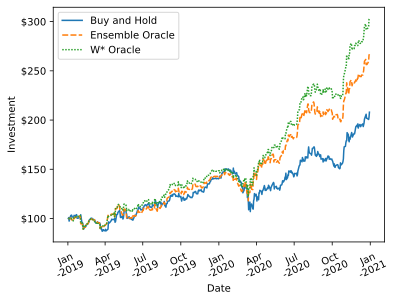

In [49]:
# Display linechart for SONY.
linechart(sony_testing_table)

In [50]:
Latex(
    r' 2. Examine your chart. Any patterns? (e.g any differences in the year 4 and year 5).'
)

<IPython.core.display.Latex object>

In [51]:
Latex(
    r'After examining the plot for SONY stock, it is clear that the prediction strategies both had a significant positive impact on the buying strategy compared to the buy and hold strategy. It seems that having a "W" value that is higher increases the accuracy and is very close to the ensemble value. I do notice from the graph itself that there is a big dip early on into 2020, and a similar looking dip at around the same time in early 2019, so that could be something to look into as an investor.'
)

<IPython.core.display.Latex object>

#### References
- https://pandas.pydata.org/docs/user_guide/style.html
- https://pandas.pydata.org/docs/user_guide/window.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Optimization
- https://seaborn.pydata.org/generated/seaborn.lineplot.html
- https://matplotlib.org/stable/api/dates_api.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
- https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
- https://docs.mathjax.org/en/latest/options/index.html#configuring-mathjax